In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
#education_df.dropna(inplace=True)

In [4]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.281000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.281000e+03,...,1485.000000,1485.000000,1485.000000,1.485000e+03,1.485000e+03,1.443000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.166431e+05,9.246804e+06,7.772786e+05,4.289618e+06,4.179907e+06,9.342417e+06,4.844756e+06,2.725092e+06,4.348513e+05,...,64216.228283,63883.304040,54378.534680,5.161999e+05,2.463631e+05,8.016962e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.067856e+06,1.200350e+07,1.155857e+06,5.674137e+06,5.608607e+06,1.220752e+07,6.433283e+06,3.420267e+06,5.426507e+05,...,80504.894652,79037.699179,68781.870366,6.442378e+05,3.092694e+05,9.820252e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.200842e+06,1.910190e+05,1.172219e+06,7.254095e+05,2.176975e+06,1.177296e+06,6.447875e+05,1.043740e+05,...,13311.000000,13018.000000,10741.000000,1.071090e+05,5.008300e+04,1.727145e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.515540e+05,5.169926e+06,4.100510e+05,2.578149e+06,2.089445e+06,5.298267e+06,2.688963e+06,1.545738e+06,2.741430e+05,...,42784.000000,43018.000000,36469.000000,3.425700e+05,1.622720e+05,5.449220e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014528e+06,1.109900e+07,8.440360e+05,5.185174e+06,4.808003e+06,1.087317e+07,5.641158e+06,3.307162e+06,5.261780e+05,...,75322.000000,76376.000000,67716.000000,6.102640e+05,2.913940e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


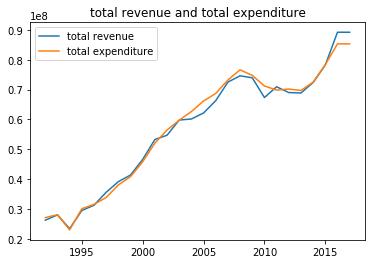

In [5]:
plt.plot(education_df.loc[education_df.STATE == "CALIFORNIA", "YEAR"],
         education_df.loc[education_df.STATE == "CALIFORNIA", "TOTAL_REVENUE"], label="total revenue")

plt.plot(education_df.loc[education_df.STATE == "CALIFORNIA", "YEAR"],
         education_df.loc[education_df.STATE == "CALIFORNIA", "TOTAL_EXPENDITURE"], label="total expenditure")

plt.title("total revenue and total expenditure")
plt.legend()
plt.show()

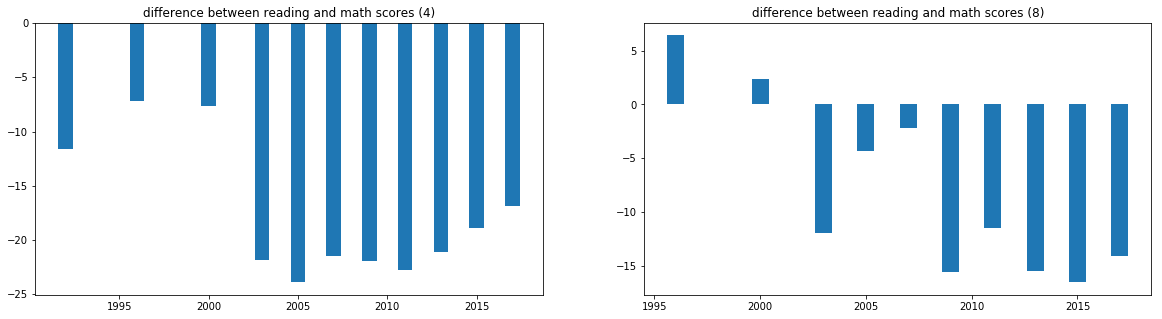

difference between reading and math scores (4)
4      -11.634547
56            NaN
108           NaN
161           NaN
213     -7.216492
264           NaN
316           NaN
367           NaN
420     -7.648537
472           NaN
524           NaN
576    -21.822545
628           NaN
680    -23.854931
731           NaN
784    -21.511905
836           NaN
891    -21.912522
944           NaN
997    -22.806357
1048          NaN
1101   -21.108497
1152          NaN
1203   -18.871396
1254          NaN
1451   -16.841127
dtype: float64
difference between reading and math scores (8)
4             NaN
56            NaN
108           NaN
161           NaN
213      6.424972
264           NaN
316           NaN
367           NaN
420      2.323040
472           NaN
524           NaN
576    -11.976121
628           NaN
680     -4.373619
731           NaN
784     -2.222356
836           NaN
891    -15.553342
944           NaN
997    -11.484551
1048          NaN
1101   -15.453063
1152          NaN
1203   -1

In [6]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.bar(education_df.loc[education_df.STATE == "CALIFORNIA", "YEAR"],
         education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_READING_4_SCORE"] - education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_MATH_4_SCORE"])

plt.title("difference between reading and math scores (4)")

plt.subplot(1,2,2)
plt.bar(education_df.loc[education_df.STATE == "CALIFORNIA", "YEAR"],
         education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_READING_8_SCORE"] - education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_MATH_8_SCORE"])

plt.title("difference between reading and math scores (8)")

plt.show()

print("difference between reading and math scores (4)")
print(education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_READING_4_SCORE"] - education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_MATH_4_SCORE"])
print("difference between reading and math scores (8)")
print(education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_READING_8_SCORE"] - education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_MATH_8_SCORE"])

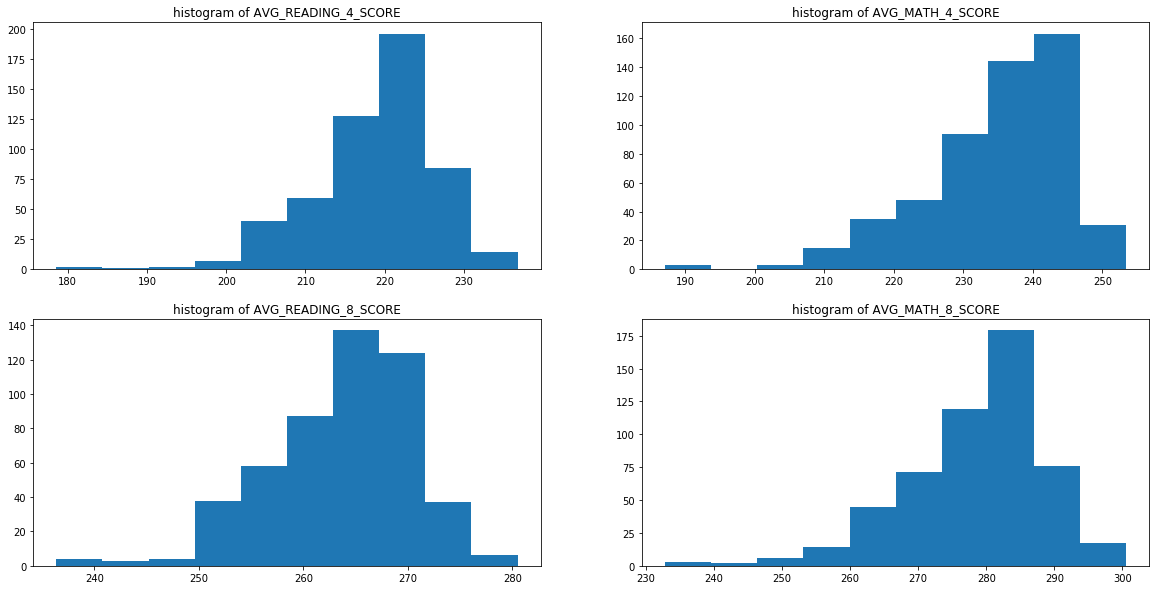

In [7]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {}".format("AVG_READING_4_SCORE"))

plt.subplot(2,2,2)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {}".format("AVG_MATH_4_SCORE"))

plt.subplot(2,2,3)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {}".format("AVG_READING_8_SCORE"))

plt.subplot(2,2,4)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {}".format("AVG_MATH_8_SCORE"))
plt.show()

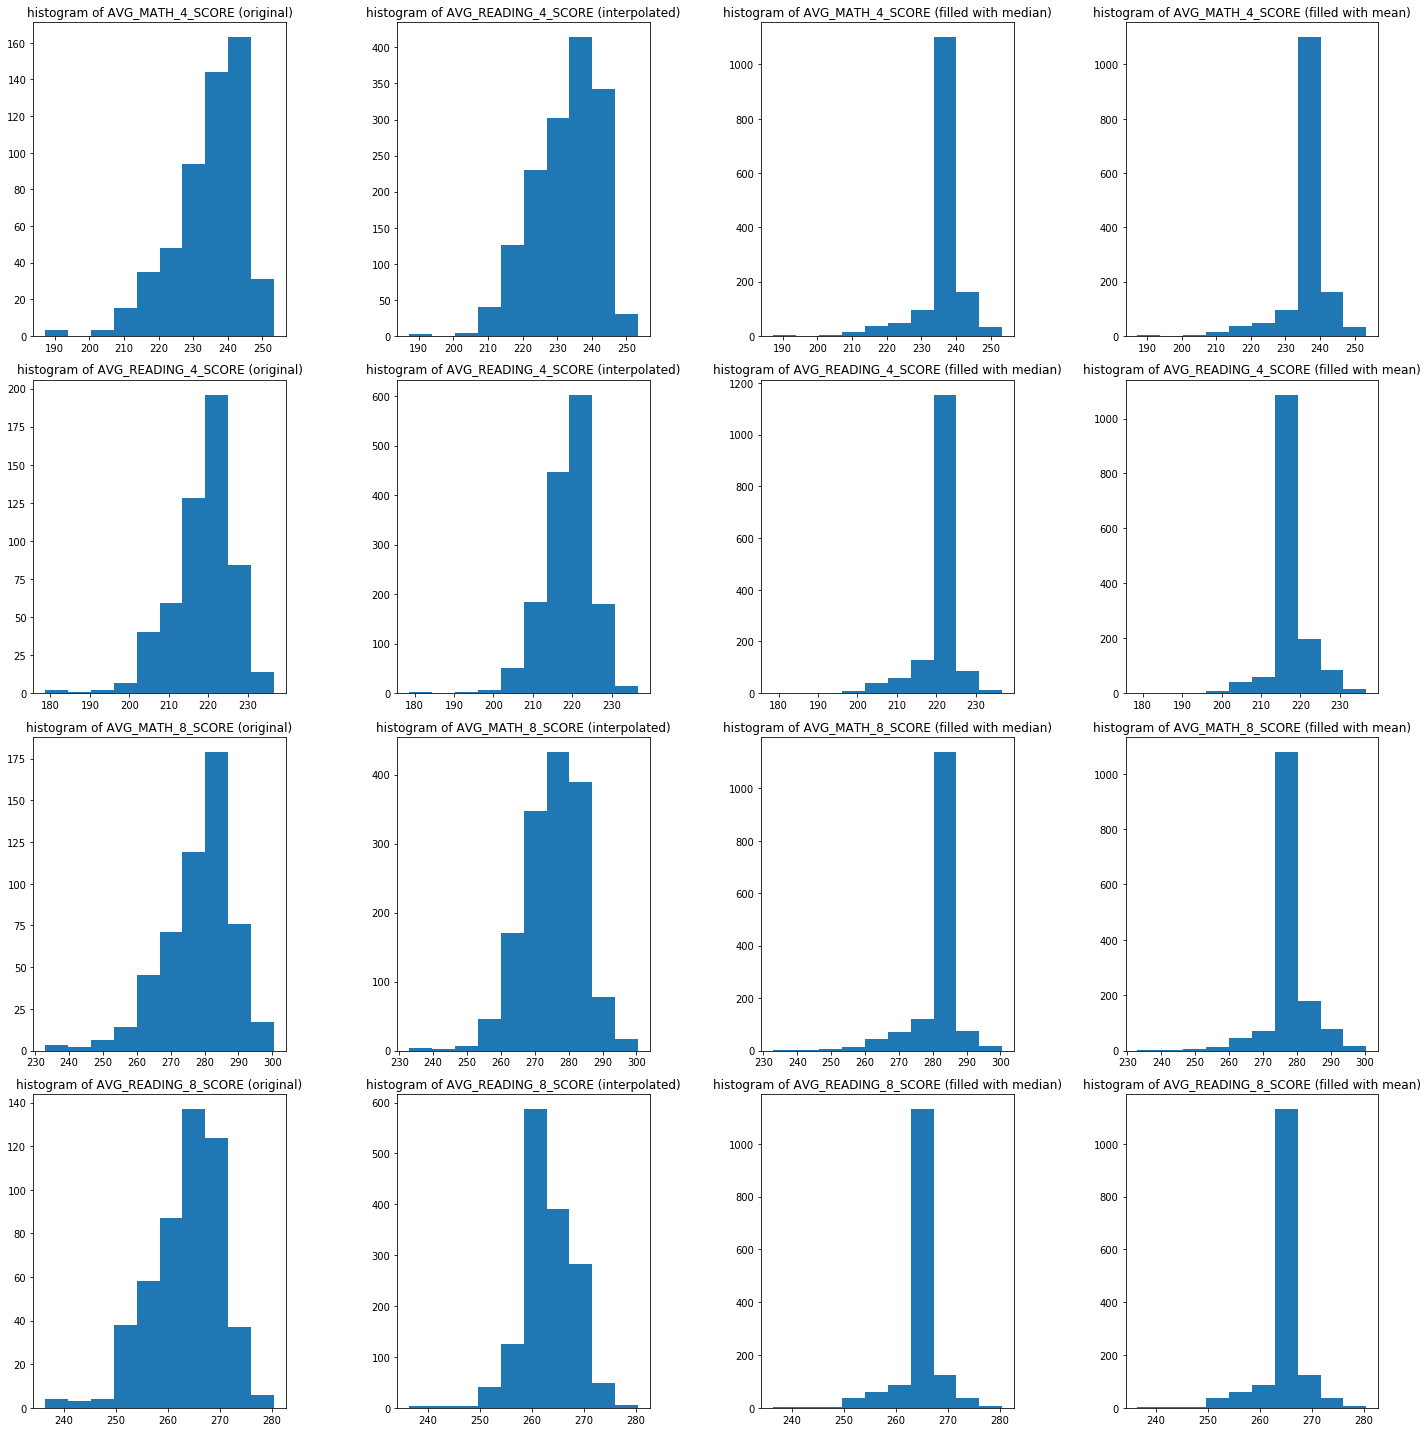

In [8]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(education_df.AVG_MATH_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))


plt.subplot(4,4,5)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(education_df.AVG_READING_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))


plt.subplot(4,4,9)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(education_df.AVG_MATH_8_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,13)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(education_df.AVG_READING_8_SCORE.interpolate().dropna())
plt.title("histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()